In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv(r'D:\Python\10.EDA\Diwali_sales\Diwali Sales Data.csv', encoding='unicode_escape')

# Exploratory Data Analysis

### Gender

### How is the gender distribution

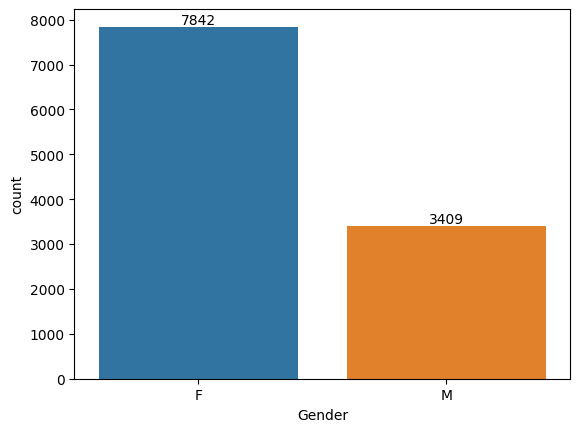

In [3]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

### Age

### How does the age distribution vary among different states,

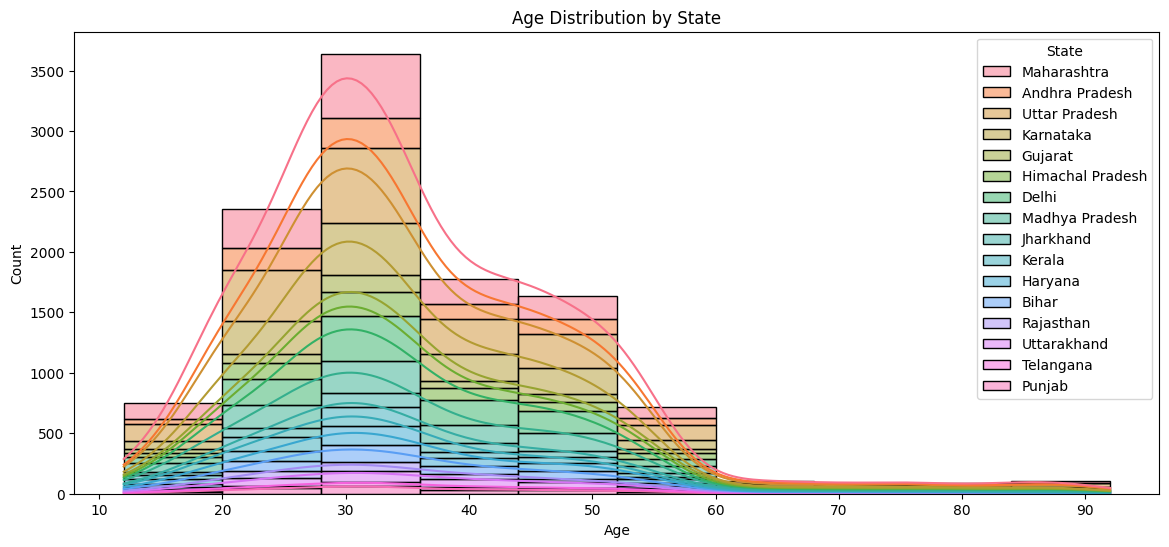

In [4]:
plt.figure(figsize=(14, 6))
sns.histplot(x='Age', hue='State', multiple='stack', data=df, bins=10, kde=True)
plt.title('Age Distribution by State')
plt.show()

### How is the distribution of customers across different age groups and genders 

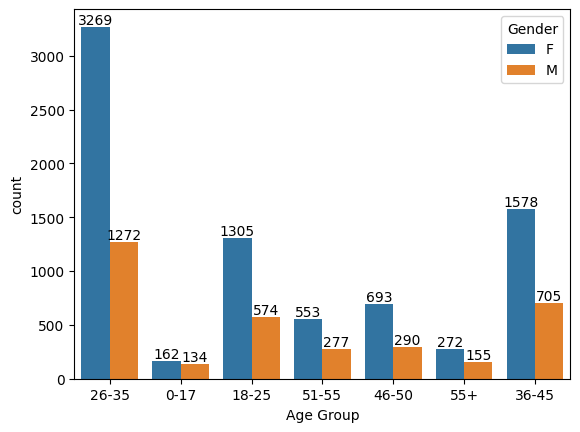

In [ ]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

### State

In [ ]:
state_summary = df.groupby('State').agg({
    'Age': 'mean',
    'Orders': 'sum',
    'Amount': 'sum'
}).reset_index()

zone_summary = df.groupby('Zone').agg({
    'Age': 'mean',
    'Orders': 'sum',
    'Amount': 'sum'
}).reset_index()

print("Summary Statistics by State:")
print(state_summary)

print("\nSummary Statistics by Zone:")
print(zone_summary)

Summary Statistics by State:
               State        Age  Orders       Amount
0     Andhra Pradesh  35.588163    2051   8037146.99
1              Bihar  35.527650    1062   4022757.00
2              Delhi  35.548007    2740  11603819.45
3            Gujarat  36.236534    1066   3946082.00
4            Haryana  35.084071    1109   4220175.00
5   Himachal Pradesh  35.555921    1568   4963368.00
6          Jharkhand  35.694737     953   3026456.00
7          Karnataka  35.280675    3240  13523540.00
8             Kerala  34.492274    1137   3894491.99
9     Madhya Pradesh  35.820847    2252   8101142.00
10       Maharashtra  34.566557    3810  14427543.00
11            Punjab  34.530000     495   1525800.00
12         Rajasthan  34.506494     555   1909409.00
13         Telangana  37.680000     312   1151490.00
14     Uttar Pradesh  35.595165    4807  19374968.00
15       Uttarakhand  36.931250     824   2520944.00

Summary Statistics by Zone:
       Zone        Age  Orders       Amou

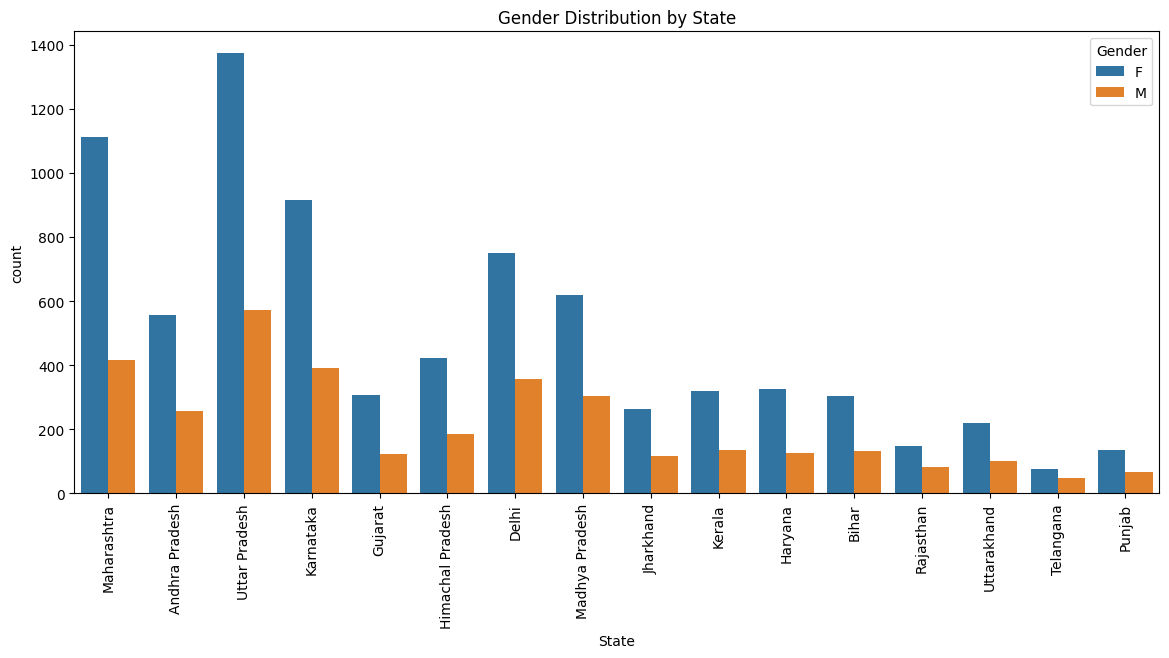

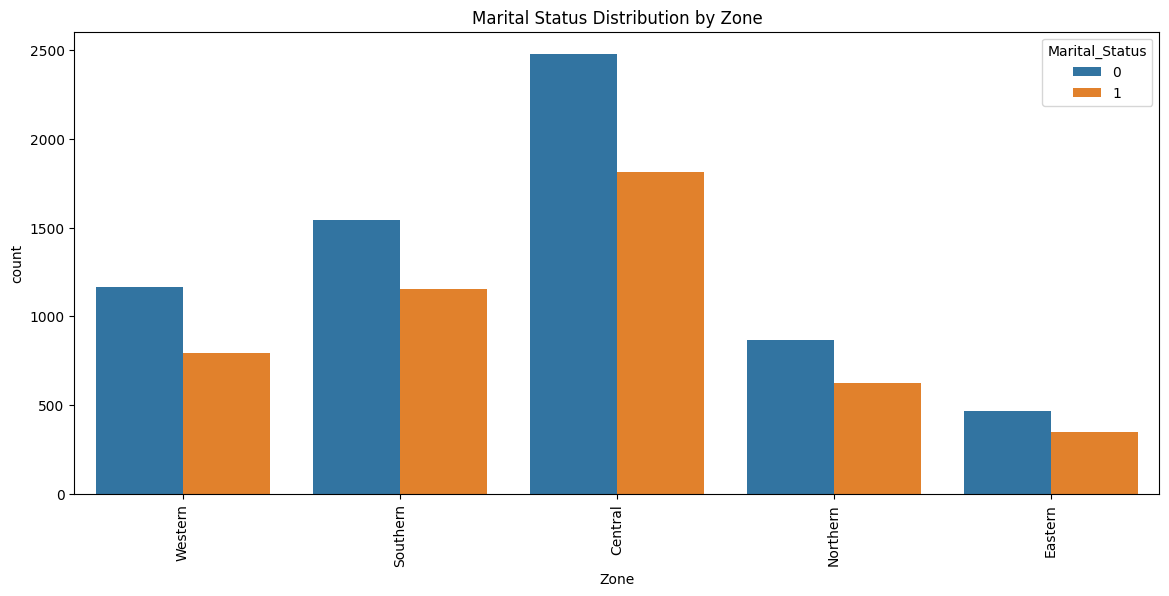

In [5]:
# 2. Distribution of Categorical Variables
plt.figure(figsize=(14, 6))
sns.countplot(x='State', hue='Gender', data=df)
plt.title('Gender Distribution by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='Zone', hue='Marital_Status', data=df)
plt.title('Marital Status Distribution by Zone')
plt.xticks(rotation=90)
plt.show()

### total number of orders from top 10 states

<Axes: xlabel='State', ylabel='Orders'>

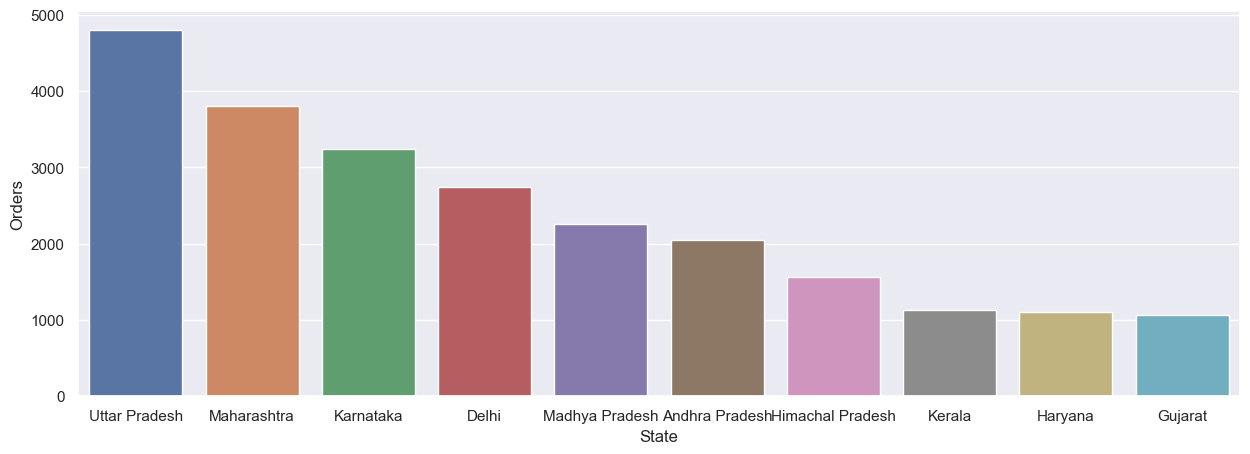

In [ ]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status
### How is the distribution of customers across different marital statuses

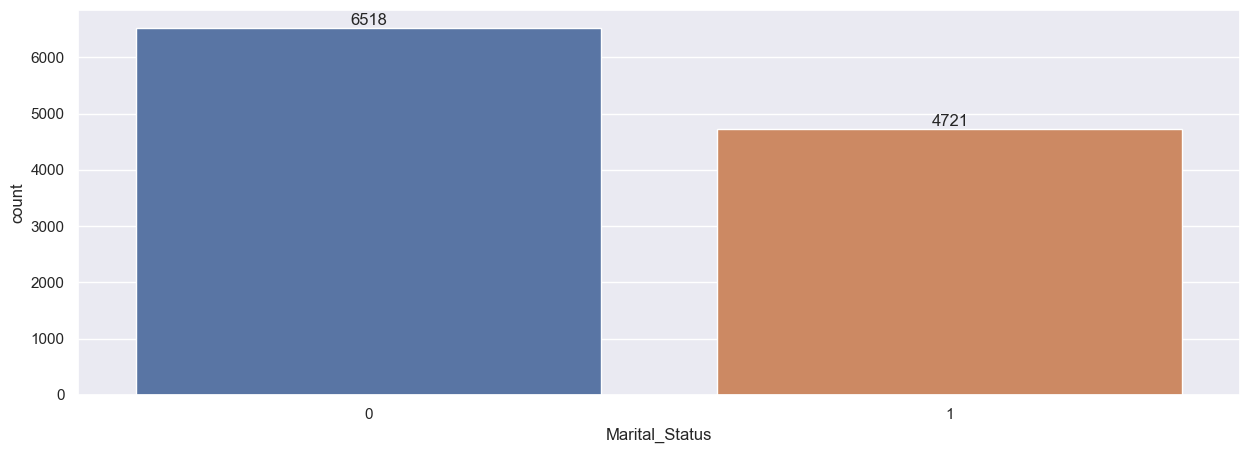

In [ ]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

### From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

<Axes: xlabel='Marital_Status', ylabel='Amount'>

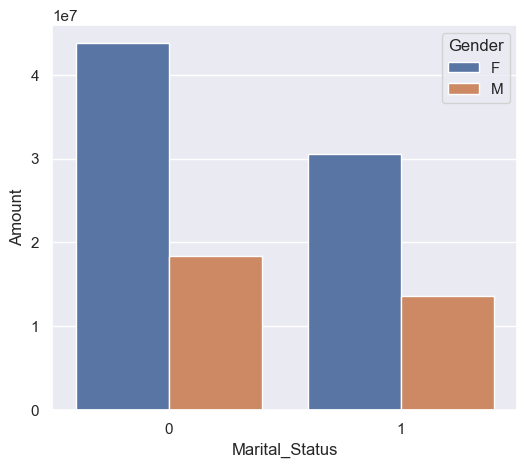

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### Occupation
### How is the distribution of customers across different occupations depicted in the count plot

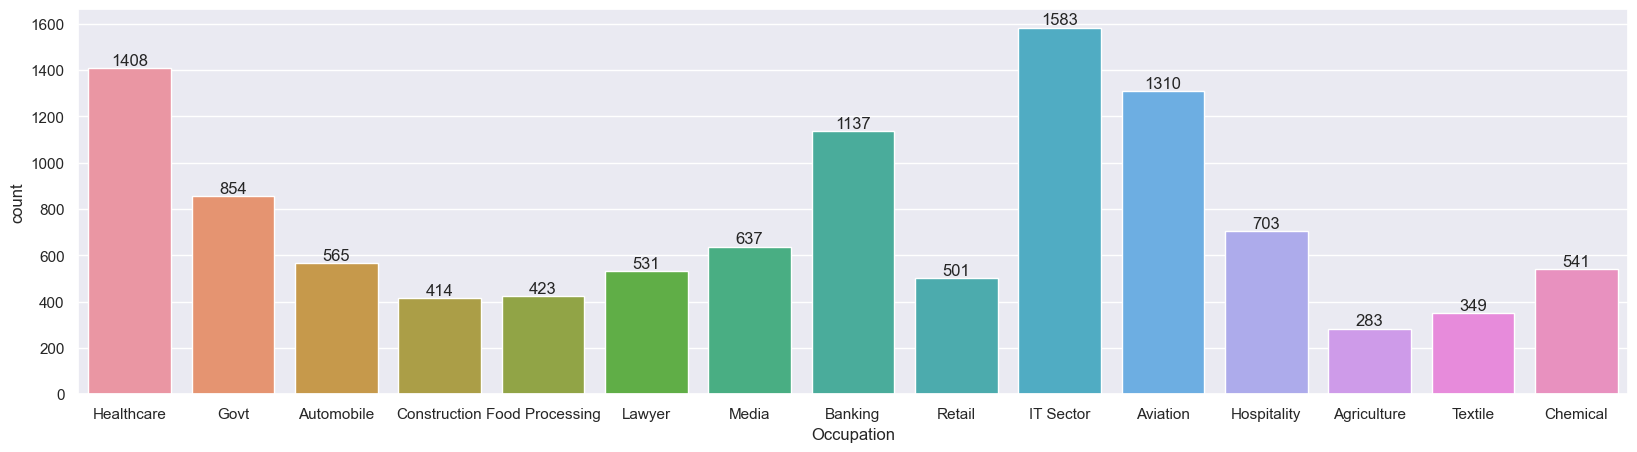

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

### What is the total sales amount for each occupation category

<Axes: xlabel='Occupation', ylabel='Amount'>

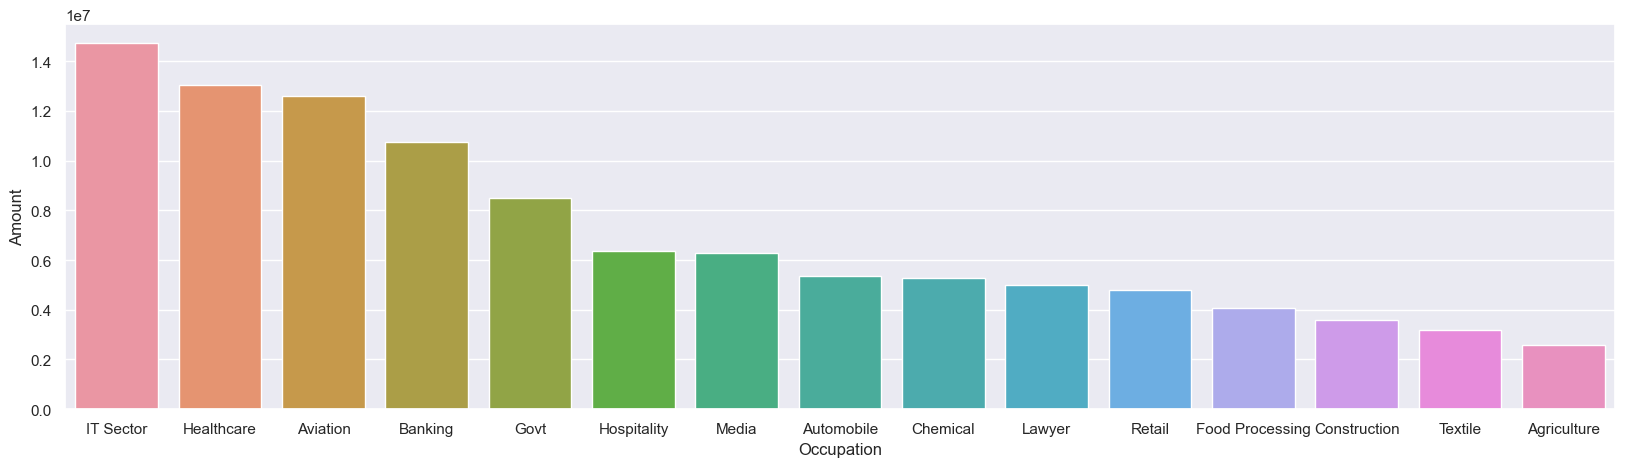

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

### "How does the distribution of the top 5 product categories vary across different states, as depicted in the count plot?"

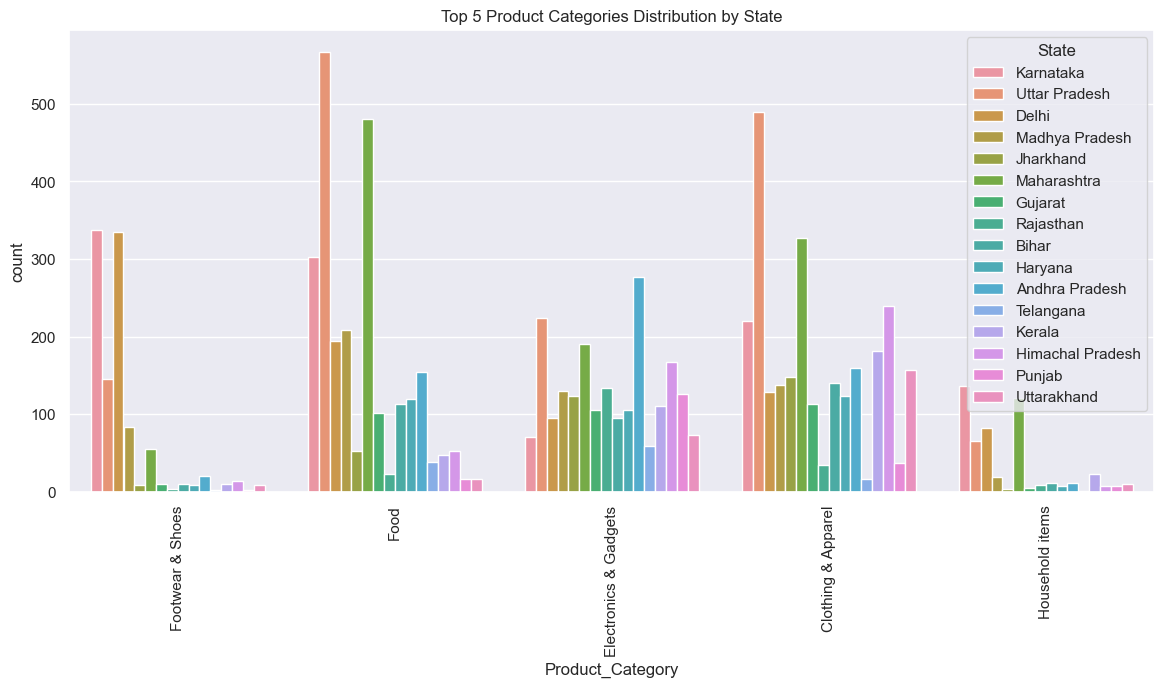

In [ ]:
# Get the top 5 product categories
top_categories = df['Product_Category'].value_counts().head(5).index

# Filter the DataFrame for the top 5 categories
df_top_categories = df[df['Product_Category'].isin(top_categories)]

# Plot the distribution
plt.figure(figsize=(14, 6))
sns.countplot(x='Product_Category', hue='State', data=df_top_categories)
plt.title('Top 5 Product Categories Distribution by State')
plt.xticks(rotation=90)
plt.show()

### What is the distribution of products across different categories

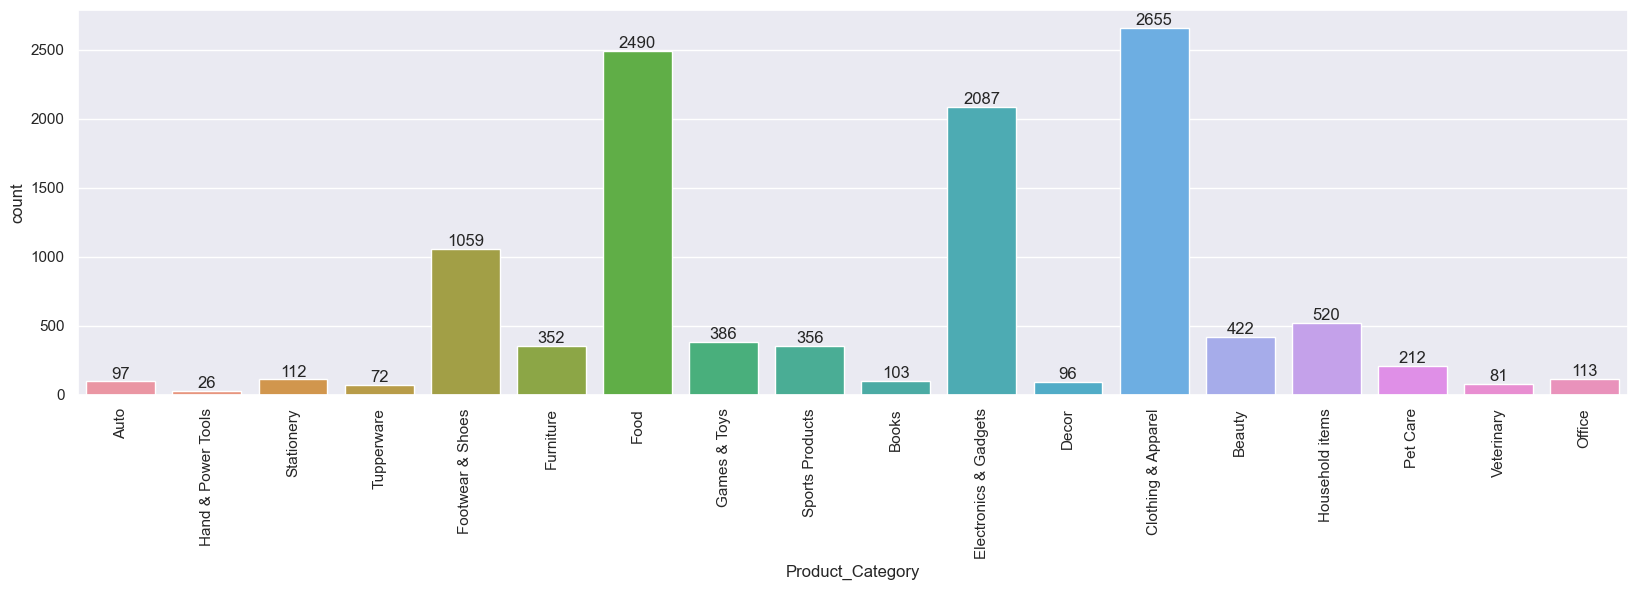

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)
    

### What insights can be derived from the top 10 product categories by total sales, and which category stands out as the highest contributor to overall sales based on the provided bar plot?

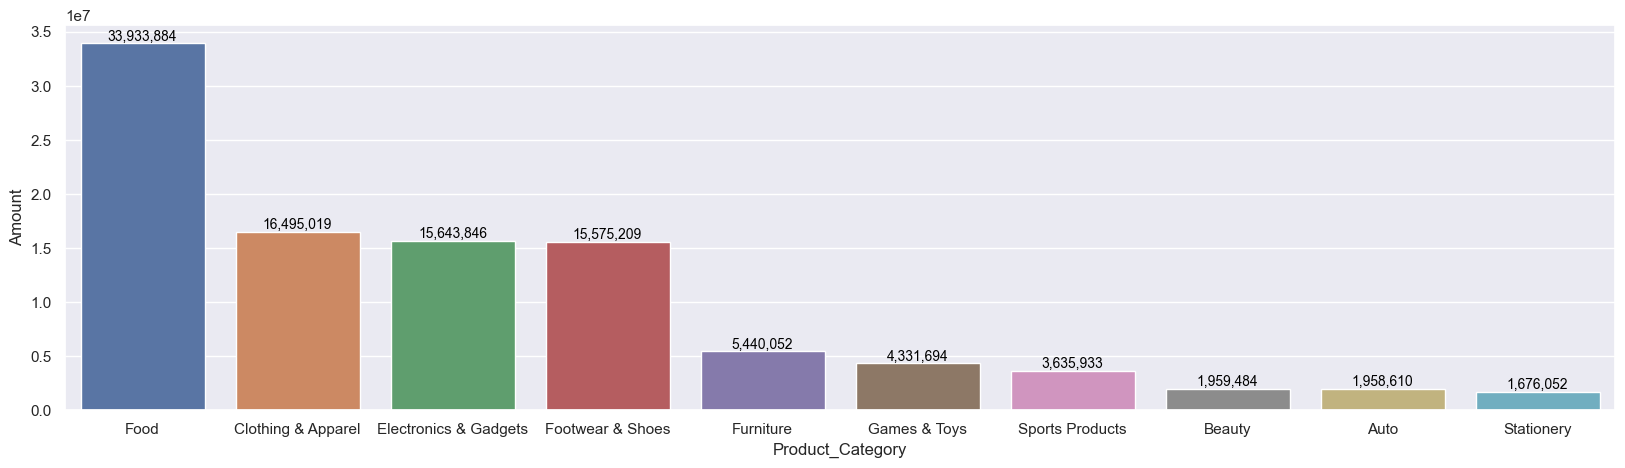

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Which are the top 10 best-selling products based on the total number of orders, and how does their order quantity compare, as illustrated in the bar plot?

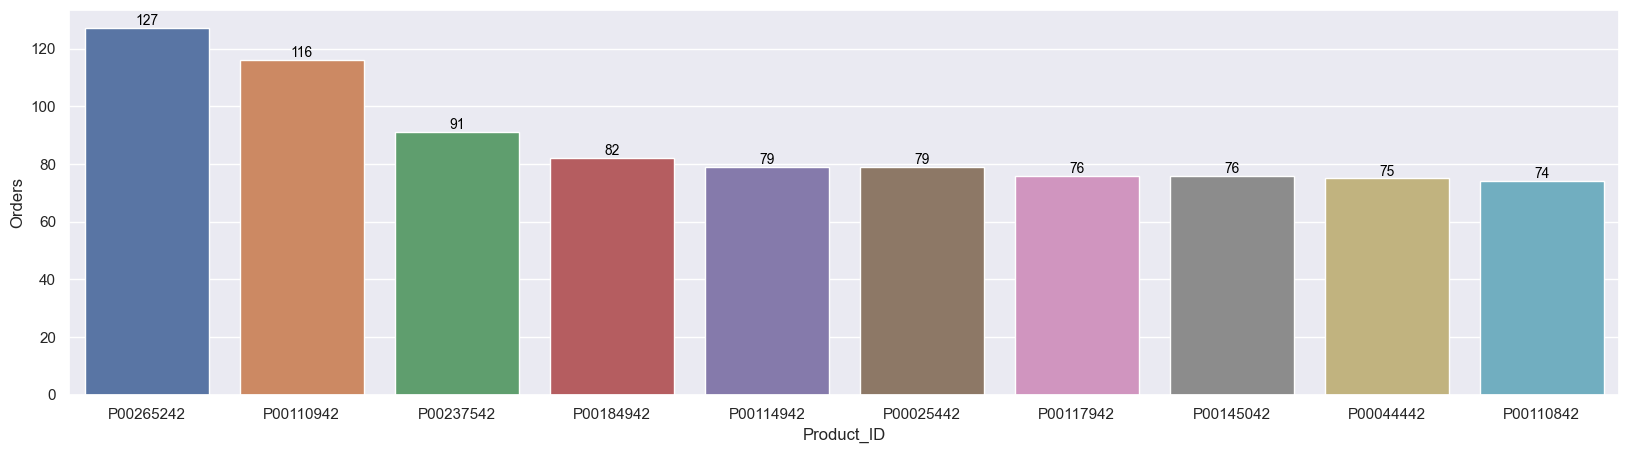

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

### top 10 most sold products (same thing as above)

<Axes: xlabel='Product_ID'>

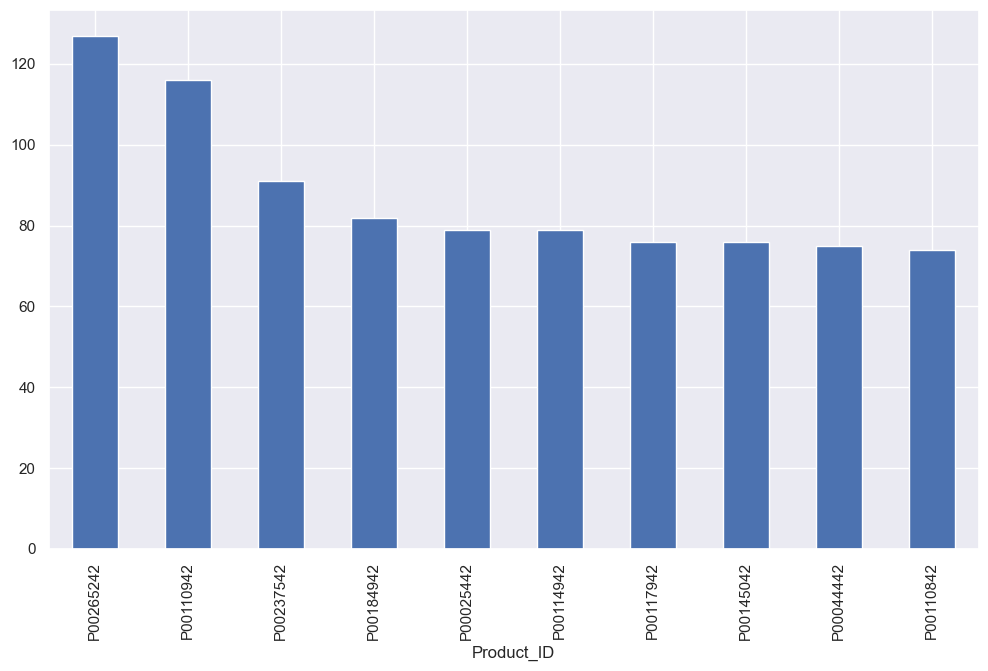

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*